# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


## importing necessary packages that might be used here :

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
from sklearn.metrics import accuracy_score

## 1.1 Reading Data

 Reading first 50000 datapts using parameter nrows

In [2]:
project_data = pd.read_csv('train_data.csv',nrows=50000)
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date project_grade_category  \
473             GA 2016-04-27 00:53:00          Grades PreK-2   
41558           WA 2016-04-27 01:05:25             Grades 3-5   

      project_subject_categories project_subject_subcategories  \
473             Applied Learning             Early Development   
41558        Literacy & Language                      Literacy   

                                project_title  \
473    Flexible Seating for Flexible Learning   
41558  Going Deep: The Art of Inner Thinking!   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  
473                                               2                    1  
41558                                             2                    1

In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

removing space in project grade category

## preprocessing of project_grade_category

In [6]:
#preprocess project grade category
print(project_data['project_grade_category'].values[0])
print("="*50)
print(project_data['project_grade_category'].values[150])
print("="*50)
print(project_data['project_grade_category'].values[1000])
print("="*50)
print(project_data['project_grade_category'].values[20000])
print("="*50)


project_data['project_grade_category'].value_counts()

Grades PreK-2
Grades 3-5
Grades PreK-2
Grades PreK-2


Grades PreK-2    20316
Grades 3-5       16968
Grades 6-8        7750
Grades 9-12       4966
Name: project_grade_category, dtype: int64

In [7]:
preprocessed_project_grade_categories= []

for grade_cat in tqdm(project_data["project_grade_category"]):
   
    grade_cat = grade_cat.replace('-', '_')  #Replacing(-) with(_)
    grade_cat = grade_cat.replace('Grades', '') #Removing grades as it is redundant
   
    grad_cat = ' '.join(f for f in grade_cat.split())
    preprocessed_project_grade_categories.append(grad_cat.strip())

100%|████████████████████████████████| 50000/50000 [00:00<00:00, 100532.54it/s]


In [8]:
print(preprocessed_project_grade_categories[1])
print("="*50)
print(preprocessed_project_grade_categories[50])
print("="*50)
print(preprocessed_project_grade_categories[500])
print("="*50)
print(preprocessed_project_grade_categories[5000])
print("="*50)
print(preprocessed_project_grade_categories[10001])
print("="*50)

3_5
3_5
PreK_2
3_5
PreK_2


## 1.2 preprocessing of `project_subject_categories`

In [9]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [10]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

# 1.4 preprocessing teacher prefix

In [11]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna('null')

In [12]:
def replace_cate(lst):          # Removing (.) in Mrs. 
    return lst.replace('.','')
   

project_data['teacher_prefix']= project_data['teacher_prefix'].astype(str).apply(replace_cate)

In [13]:
preprocessed_teacher_prefix = []

for teach_prefix in tqdm(project_data["teacher_prefix"]):
    
    preprocessed_teacher_prefix.append(teach_prefix.strip())

100%|████████████████████████████████| 50000/50000 [00:00<00:00, 268626.63it/s]


In [14]:
print(preprocessed_teacher_prefix[1])
print("="*50)
print(preprocessed_teacher_prefix[50])
print("="*50)
project_data.teacher_prefix.value_counts()

Mrs
Mrs


Mrs        26140
Ms         17936
Mr          4859
Teacher     1061
Dr             2
null           2
Name: teacher_prefix, dtype: int64

# Adding a new feature Number of words in title

In [15]:
title_word_count = []

In [16]:
for a in project_data["project_title"] :
    b = len(a.split())
    title_word_count.append(b)

In [17]:
project_data["title_word_count"] = title_word_count

In [18]:
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3            Mrs   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5            Mrs   
29891      146723  p099708  c0a28c79fe8ad5810da49de47b3fb491            Mrs   
23374       72317  p087808  598621c141cda5fb184ee7e8ccdd3fcc             Ms   
49228       57854  p099430  4000cfe0c8b2df75a218347c1765e283             Ms   

      school_state                Date project_grade_category  \
473             GA 2016-04-27 00:53:00          Grades PreK-2   
41558           WA 2016-04-27 01:05:25             Grades 3-5   
29891           CA 2016-04-27 01:10:09             Grades 3-5   
23374           CA 2016-04-27 02:04:15          Grades PreK-2   
49228           IL 2016-04-27 07:19:44          Grades PreK-2   

                                  project_title  \
473      Flexible Seating for Flexible Learning   
41558    Going Deep: The Art of Inner Thinking!   
29891        Breakout Box to Ignite Engagement!   
23374                         iPad for Learners   
49228  A flexible classroom for flexible minds!   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   
29891  It's the end of the school year. Routines have...   
23374  Never has society so rapidly changed. Technolo...   
49228  My students yearn for a classroom environment ...   

                                         project_essay_2  \
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   
29891  My students desire challenges, movement, and c...   
23374  Our Language Arts and Social Justice Magnet Sc...   
49228  I have the privilege of teaching an incredible...   

                                         project_essay_3  \
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   
29891  I will design different clues using specific c...   
23374  \"Is it my turn, Ms. K? When am I going to be ...   
49228  Ideally, I would love to delve right into \"fl...   

                                         project_essay_4  \
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   
29891  Donations to this project will immediately imp...   
23374  By donating to this project, you will give my ...   
49228  This project will be so beneficial for my stud...   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   
29891  My students need items from a \"Breakout Box\"...   
23374                      My students need 1 ipad mini.   
49228  My students need 5 Hokki Stools and an easel o...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
473                                               2                    1   
41558                                             2                    1   
29891                                             6                    1   
23374                                           127                    1   
49228                                             1                    1   

                  clean_categories         clean_subcategories  \
473                AppliedLearning            EarlyDevelopment   
41558            Literacy_Language                    Literacy   
29891  Math_Science History_Civics  Mathematics SocialSciences   
23374            Literacy_Language                ESL Literacy   
49228            Literacy_Language                    Literacy   

       title_word_count  
473                   5  
41558                 7  
29891                 5  
23374                 3  
49228                 6

# 1.5 Combining all 4 project essays to one big essay

In [19]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

#  1.6 Adding a new feature Number of words in essay

In [20]:
essay_word_count=[]

In [21]:
for ess in project_data["essay"] :
    c = len(ess.split())
    essay_word_count.append(c)
    

In [22]:
project_data["essay_word_count"] = essay_word_count

In [23]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3            Mrs   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5            Mrs   

      school_state                Date project_grade_category  \
473             GA 2016-04-27 00:53:00          Grades PreK-2   
41558           WA 2016-04-27 01:05:25             Grades 3-5   

                                project_title  \
473    Flexible Seating for Flexible Learning   
41558  Going Deep: The Art of Inner Thinking!   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
473                                               2                    1   
41558                                             2                    1   

        clean_categories clean_subcategories  title_word_count  \
473      AppliedLearning    EarlyDevelopment                 5   
41558  Literacy_Language            Literacy                 7   

                                                   essay  essay_word_count  
473    I recently read an article about giving studen...               225  
41558  My students crave challenge, they eat obstacle...               184

# 1.7 Train test split
 Splitting of dataset is happening first to avoid the problem of data leakage

<img src="train.png">

In [24]:
# train test split using sklearn.model selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(project_data, project_data['project_is_approved'], test_size=0.33, stratify = project_data['project_is_approved'],random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train,random_state=0)

In [25]:
X_train.drop(['project_is_approved'], axis=1, inplace=True)
X_test.drop(['project_is_approved'], axis=1, inplace=True)
X_cv.drop(['project_is_approved'], axis=1, inplace=True)

# 1.8 Text preprocessing

In [26]:
# printing some random reviews

print(X_train['essay'].values[0])
print("="*50)
print(X_train['essay'].values[500])
print("="*50)
print(X_train['essay'].values[1000])
print("="*50)
print(X_train['essay'].values[10000])
print("="*50)
print(X_train['essay'].values[20000])
print("="*50)

Northeast Hamilton is more than a school, it's a family! Our family has been through some tough times the last several years. Our enrollment dwindled and our unique pre-k to 12th grade school became just an elementary school. But our students are resilient, and our staff is dedicated! We are becoming stronger as we redefine our image. Our goal is to help the students at NEH develop an innovative mindset ready to take ownership for their learning and change the world!Students today need the time an space to be innovative. They deserve to have the tools to help them tinker and pursue their passions. Author George Courous wrote in his book, The Innovator's Mindset, \"In a world where new challenges constantly arise, students must be taught to think critically about what they are facing. They must learn to collaborate with others to develop solutions for problems.\" I want to create a Magical Makerspace where all of the students in our school can wonder, explore, design, create, and develo

In [27]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [28]:
sent = decontracted(X_train['essay'].values[20000])
print(sent)
print("="*50)

As a teacher in a low income, poverty stricken neighborhood my students face many challenges both in and out of the classroom. Despite the odds against them, my students are motivated individuals with a passion for learning. Simply put, they just want to learn.  As a passionate teacher it is my top priority to see that they have access to educational resources, technology, and books! I want my students to know that they have people on their side that care about their education.My 5th grade are great with video and computer games but it is one thing to know how to use these technologies. It’s another, however, to understand the logic behind them. When learning to program, kids understand the digital world they inhabit. Coding is the  “magic” of technology so they can truly understand the logic and science that controls this technology. \r\nProgramming gives children the ability to create technologies that impact those around them. These Dash and Dot robots will enable my students to lea

In [29]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

As a teacher in a low income, poverty stricken neighborhood my students face many challenges both in and out of the classroom. Despite the odds against them, my students are motivated individuals with a passion for learning. Simply put, they just want to learn.  As a passionate teacher it is my top priority to see that they have access to educational resources, technology, and books! I want my students to know that they have people on their side that care about their education.My 5th grade are great with video and computer games but it is one thing to know how to use these technologies. It’s another, however, to understand the logic behind them. When learning to program, kids understand the digital world they inhabit. Coding is the  “magic” of technology so they can truly understand the logic and science that controls this technology.   Programming gives children the ability to create technologies that impact those around them. These Dash and Dot robots will enable my students to learn

In [30]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

As a teacher in a low income poverty stricken neighborhood my students face many challenges both in and out of the classroom Despite the odds against them my students are motivated individuals with a passion for learning Simply put they just want to learn As a passionate teacher it is my top priority to see that they have access to educational resources technology and books I want my students to know that they have people on their side that care about their education My 5th grade are great with video and computer games but it is one thing to know how to use these technologies It s another however to understand the logic behind them When learning to program kids understand the digital world they inhabit Coding is the magic of technology so they can truly understand the logic and science that controls this technology Programming gives children the ability to create technologies that impact those around them These Dash and Dot robots will enable my students to learn how to code and when k

In [31]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

# 1.8.1 Preprocessesd training data - Text

In [32]:
# Combining all the above

from tqdm import tqdm
preprocessed_essays_train = []
# tqdm is for printing the status bar
for sentence in tqdm(X_train['essay'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_train.append(sent.lower().strip())

100%|███████████████████████████████████| 22445/22445 [01:07<00:00, 333.52it/s]


In [33]:
# after preprocesing
preprocessed_essays_train[2000]

'school located low socio economic area students always hard working eager learn backgrounds like celebrate academic success encourage future opportunities leave memories learning fun teachers not wait celebrate student achievements 5th grade graduation worked hard year made great progress able give copy dr seuss book oh places go small token see future plan use 50 copies oh places go dr seuss graduation gift kids pass student book teachers school teachers write encouraging notes memories students know idea not new many parents kids however many parents struggle not able afford books help able give experience kids may even take books move middle school high school done project past kids always end bringing books school next day share notes letters also plan keep project secret great surprise kids open book nannan'

#  1.8.2 preprocessed test data

In [34]:
preprocessed_essays_test = []
# tqdm is for printing the status bar
for sentence in tqdm(X_test['essay'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_test.append(sent.lower().strip())

100%|███████████████████████████████████| 16500/16500 [00:51<00:00, 317.31it/s]


In [35]:

# after preprocesing test data
preprocessed_essays_test[1000]

'teach 2 way spanish dual immersion school wonderful class brilliant exploring minds take us endless opportunities everyday students minds challenged english spanish enjoy languages songs role play academics social interactions school culturally diverse share embrace cultures traditions school community friendships build students become excited working playing two languages goal guide students high academic achievement subject areas languages also support appreciation understanding cultures developing positive attitudes among students families communities students need easel painting supplies create explore daily bases make learning fun students learning two languages everyday would wonderful express learning art subjects connected art want give students opportunity write sentences second language draw picture connecting writing give meaning want students share creations want practice language artwork materials make difference students displayed work gives joy pride nannan'

# 1.8.3 Preprocessed cross validation data

In [36]:
preprocessed_essays_cv = []
# tqdm is for printing the status bar
for sentence in tqdm(X_cv['essay'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_cv.append(sent.lower().strip())

100%|███████████████████████████████████| 11055/11055 [00:33<00:00, 331.85it/s]


In [37]:

# after preprocesing
preprocessed_essays_cv[2000]

'teach computer science title school louisiana 100 percent students receive free breakfast lunch many students receive backpack food weekend despite many hardships students love anything technology resources limited students living poverty also limited access technology school home not sufficient access technology deprives students necessary skills need succeed today workforce introducing coding robotics young learners challenge would like use cubelets robotics introduce preschool kindergarten first graders robotics kit contains 6 cubelets snapped together make endless variety robots no programming no wires anyone build robots drive around tabletop respond light objects surprisingly lifelike behavior instead programming behavior snap cubelets together watch behavior emerge like flock birds swarm bees cubelet tiny computer inside robot right put cubelets together actually making robot several smaller robots cubelet communicates neighbors know two blocks next talking charger included pre

# 1.9  preprocessing of project title

In [38]:
# printing some randomproject titles.
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[150])
print("="*50)
print(project_data['project_title'].values[1000])
print("="*50)
print(project_data['project_title'].values[20000])
print("="*50)

Flexible Seating for Flexible Learning
Elmo for Math Instruction
Comfy Carpet for Creative Learning
Wiggle, Waggle, Wobble: Hocus Focus!


# 1.9.1 Preprocessing of Project Title(Train)

In [39]:
preprocessed_titles_train = []

for titles in tqdm(X_train["project_title"]):
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(f for f in title.split() if f not in stopwords)
    preprocessed_titles_train.append(title.lower().strip())
    

100%|██████████████████████████████████| 22445/22445 [00:03<00:00, 6829.80it/s]


In [40]:

preprocessed_titles_train[1000]

'technology hands play engaged learning for all'

# 1.9.2 Preprocessing of Project Title(Test)

In [41]:
preprocessed_titles_test = []

for titles in tqdm(X_test["project_title"]):
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(f for f in title.split() if f not in stopwords)
    preprocessed_titles_test.append(title.lower().strip())

100%|██████████████████████████████████| 16500/16500 [00:02<00:00, 6327.01it/s]


In [ ]:
preprocessed_titles_test[1000]

# 1.9.3 Preprocessing of Project Title(Cv)

In [42]:
preprocessed_titles_cv = []

for titles in tqdm(X_cv["project_title"]):
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(f for f in title.split() if f not in stopwords)
    preprocessed_titles_cv.append(title.lower().strip())

100%|██████████████████████████████████| 11055/11055 [00:01<00:00, 6650.91it/s]


In [43]:
preprocessed_titles_cv[600]

'robotics programming middle schoolers'

## 1.10 Preparing data for models

In [44]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'title_word_count', 'essay',
       'essay_word_count'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optional)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

# one hot vector for clean categories of Projects (train,test,cv)

In [45]:
# we use count vectorizer to convert the values into one hot vectors 

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)

categories_one_hot_train = vectorizer.transform(X_train['clean_categories'].values)
categories_one_hot_test = vectorizer.transform(X_test['clean_categories'].values)
categories_one_hot_cv = vectorizer.transform(X_cv['clean_categories'].values)

print(vectorizer.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",categories_one_hot_test.shape)
print("Shape of matrix of CV data after one hot encoding ",categories_one_hot_cv.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix of Train data after one hot encoding  (22445, 9)
Shape of matrix of Test data after one hot encoding  (16500, 9)
Shape of matrix of CV data after one hot encoding  (11055, 9)


# one hot vector for clean subcategories (train ,test,cv)

In [46]:
# we use count vectorizer to convert the values into one 

vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)

sub_categories_one_hot_train = vectorizer.transform(X_train['clean_subcategories'].values)
sub_categories_one_hot_test = vectorizer.transform(X_test['clean_subcategories'].values)
sub_categories_one_hot_cv = vectorizer.transform(X_cv['clean_subcategories'].values)


print(vectorizer.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",sub_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",sub_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",sub_categories_one_hot_cv.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix of Train data after one hot encoding  (22445, 30)
Shape of matrix of Test data after one hot encoding  (16500, 30)
Shape of matrix of Cross Validation data after one hot encoding  (11055, 30)


# One hot vector for school states(train,test,cv)

In [47]:
my_counter = Counter()
for state in project_data['school_state'].values:
    my_counter.update(state.split())

In [48]:
school_state_cat_dict = dict(my_counter)
sorted_school_state_cat_dict = dict(sorted(school_state_cat_dict.items(), key=lambda kv: kv[1]))

In [49]:
## Using count vectorizer to convert the values into one hot encoded features

vectorizer = CountVectorizer(vocabulary=list(sorted_school_state_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['school_state'].values)

school_state_categories_one_hot_train = vectorizer.transform(X_train['school_state'].values)
school_state_categories_one_hot_test = vectorizer.transform(X_test['school_state'].values)
school_state_categories_one_hot_cv = vectorizer.transform(X_cv['school_state'].values)

print(vectorizer.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",school_state_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",school_state_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",school_state_categories_one_hot_cv.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'NH', 'SD', 'NE', 'AK', 'DE', 'WV', 'ME', 'NM', 'HI', 'DC', 'KS', 'ID', 'IA', 'AR', 'CO', 'MN', 'OR', 'MS', 'KY', 'NV', 'MD', 'TN', 'CT', 'AL', 'UT', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'MA', 'LA', 'WA', 'MO', 'IN', 'OH', 'PA', 'MI', 'GA', 'SC', 'IL', 'NC', 'FL', 'TX', 'NY', 'CA']
Shape of matrix of Train data after one hot encoding  (22445, 51)
Shape of matrix of Test data after one hot encoding  (16500, 51)
Shape of matrix of Cross Validation data after one hot encoding  (11055, 51)


abbreviations chart
<img src="two.png">

# one hot vector for Project grade category (train,test,cv)

In [50]:
my_counter = Counter()
for project_grade in preprocessed_project_grade_categories:
    my_counter.update(project_grade.split())

In [51]:
project_grade_cat_dict = dict(my_counter)
sorted_project_grade_cat_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))

In [52]:
## we use count vectorizer to convert the values into one hot encoded features

vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['project_grade_category'].values)

project_grade_categories_one_hot_train = vectorizer.transform(X_train['project_grade_category'].values)
project_grade_categories_one_hot_test = vectorizer.transform(X_test['project_grade_category'].values)
project_grade_categories_one_hot_cv = vectorizer.transform(X_cv['project_grade_category'].values)

print(vectorizer.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",project_grade_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",project_grade_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",project_grade_categories_one_hot_cv.shape)

['9_12', '6_8', '3_5', 'PreK_2']
Shape of matrix of Train data after one hot encoding  (22445, 4)
Shape of matrix of Test data after one hot encoding  (16500, 4)
Shape of matrix of Cross Validation data after one hot encoding  (11055, 4)


# One hot vector for teacher prefix(train,test,cv)

In [54]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
teacher_prefix_categories_one_hot_train = vectorizer.transform(X_train['teacher_prefix'].values)
teacher_prefix_categories_one_hot_cv = vectorizer.transform(X_cv['teacher_prefix'].values)
teacher_prefix_categories_one_hot_test = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print("Shape of matrix of Train data after one hot encoding",teacher_prefix_categories_one_hot_train.shape, y_train.shape)
print("Shape of matrix of cv data after one hot encoding",teacher_prefix_categories_one_hot_cv.shape, y_cv.shape)
print("Shape of matrix of Test data after one hot encoding",teacher_prefix_categories_one_hot_test.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
Shape of matrix of Train data after one hot encoding (22445, 5) (22445,)
Shape of matrix of cv data after one hot encoding (11055, 5) (11055,)
Shape of matrix of Test data after one hot encoding (16500, 5) (16500,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


### 1.11 Vectorizing Text data

#### (A)  Bag of words

#### BOW (train essays)

In [55]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,max_features=5000)  #selecting top 5000 features
vectorizer.fit(preprocessed_essays_train)

text_bow_train = vectorizer.transform(preprocessed_essays_train)

print("Shape of matrix after one hot encoding ",text_bow_train.shape)

Shape of matrix after one hot encoding  (22445, 5000)


#### Bow (test data essays)

In [56]:
text_bow_test = vectorizer.transform(preprocessed_essays_test)
print("Shape of matrix after one hot encoding ",text_bow_test.shape)

Shape of matrix after one hot encoding  (16500, 5000)


#### BOW Cv data essays

In [57]:
text_bow_cv = vectorizer.transform(preprocessed_essays_cv)
print("Shape of matrix after one hot encoding ",text_bow_cv.shape)

Shape of matrix after one hot encoding  (11055, 5000)


#### BOW train titles

In [58]:
vectorizer.fit(preprocessed_titles_train)
title_bow_train = vectorizer.transform(preprocessed_titles_train)
print("Shape of matrix after one hot encoding ",title_bow_train.shape)

Shape of matrix after one hot encoding  (22445, 1241)


#### BOW test titles

In [59]:
title_bow_test = vectorizer.transform(preprocessed_titles_test)
print("Shape of matrix after one hot encoding ",title_bow_test.shape)

Shape of matrix after one hot encoding  (16500, 1241)


#### BOW cv titles

In [60]:
title_bow_cv = vectorizer.transform(preprocessed_titles_cv)
print("Shape of matrix after one hot encoding ",title_bow_cv.shape)

Shape of matrix after one hot encoding  (11055, 1241)


#### B) TFIDF vectorizer

#### tfidf train essays

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10,max_features=5000) #Considering top 5000 features
vectorizer.fit(preprocessed_essays_train)

text_tfidf_train = vectorizer.transform(preprocessed_essays_train)
print("Shape of matrix after one hot encoding ",text_tfidf_train.shape)

Shape of matrix after one hot encoding  (22445, 5000)


#### tfidf test essays

In [63]:
text_tfidf_test = vectorizer.transform(preprocessed_essays_test)
print("Shape of matrix after one hot encoding ",text_tfidf_test.shape)

Shape of matrix after one hot encoding  (16500, 5000)


#### tfidf cv essays

In [64]:
text_tfidf_cv = vectorizer.transform(preprocessed_essays_cv)
print("Shape of matrix after one hot encoding ",text_tfidf_cv.shape)

Shape of matrix after one hot encoding  (11055, 5000)


#### tfidf train titles

In [65]:
vectorizer = TfidfVectorizer(min_df=10)

vectorizer.fit(preprocessed_titles_train)
title_tfidf_train = vectorizer.transform(preprocessed_titles_train)
print("Shape of matrix after one hot encoding ",title_tfidf_train.shape)

Shape of matrix after one hot encoding  (22445, 1241)


#### tfidf test titles

In [66]:

title_tfidf_test = vectorizer.transform(preprocessed_titles_test)
print("Shape of matrix after one hot encoding ",title_tfidf_test.shape)

Shape of matrix after one hot encoding  (16500, 1241)


#### tfidf cv titles

In [67]:
title_tfidf_cv = vectorizer.transform(preprocessed_titles_cv)
print("Shape of matrix after one hot encoding ",title_tfidf_cv.shape)

Shape of matrix after one hot encoding  (11055, 1241)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [ ]:
''''# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039

 #Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

words_train_essays = []

for i in preprocessed_essays_train :
    words_train_essays.extend(i.split(' '))

## Find the total number of words in the Train data of Essays.

print("all the words in the corpus", len(words_train_essays))


## Find the unique words in this set of words

words_train_essay = set(words_train_essays)
print("the unique words in the corpus", len(words_train_essay))

## Find the words present in both Glove Vectors as well as our corpus.

inter_words = set(model.keys()).intersection(words_train_essay)

print("The number of words that are present in both glove vectors and our corpus are {} which \
is nearly {}% ".format(len(inter_words), np.round((float(len(inter_words))/len(words_train_essay))*100)))

In [ ]:
'''#words_corpus_train_essay = {}

words_glove = set(model.keys())

for i in words_train_essay:
    if i in words_glove:
        words_corpus_train_essay[i] = model[i]

print("word 2 vec length", len(words_corpus_train_essay))

In [ ]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
'''
import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_corpus_train_essay, f)

In [68]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

# train essays

In [69]:
# average Word2Vec
# compute average word2vec for each review.

avg_w2v_vectors_train = []; 

for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))

100%|███████████████████████████████████| 22445/22445 [00:29<00:00, 760.25it/s]


22445
300


# test essays

In [70]:
# average Word2Vec
# compute average word2vec for each review.

avg_w2v_vectors_test = []; 

for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|███████████████████████████████████| 16500/16500 [00:22<00:00, 717.76it/s]


16500
300


# cv essays

In [71]:
# average Word2Vec
# compute average word2vec for each review.

avg_w2v_vectors_cv = []; 

for sentence in tqdm(preprocessed_essays_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

print(len(avg_w2v_vectors_cv))
print(len(avg_w2v_vectors_cv[0]))

100%|███████████████████████████████████| 11055/11055 [00:15<00:00, 718.65it/s]


11055
300


# train titles

In [72]:
# Similarly you can vectorize for title also

avg_w2v_vectors_titles_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_train): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_train.append(vector)

print(len(avg_w2v_vectors_titles_train))
print(len(avg_w2v_vectors_titles_train[0]))

100%|█████████████████████████████████| 22445/22445 [00:01<00:00, 13224.47it/s]


22445
300


# test titles

In [73]:

# Similarly you can vectorize for title also

avg_w2v_vectors_titles_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_test): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_test.append(vector)

print(len(avg_w2v_vectors_titles_test))
print(len(avg_w2v_vectors_titles_test[0]))

100%|█████████████████████████████████| 16500/16500 [00:01<00:00, 13526.02it/s]


16500
300


# cv titles

In [74]:
# Similarly you can vectorize for title also

avg_w2v_vectors_titles_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_cv): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_cv.append(vector)

print(len(avg_w2v_vectors_titles_cv))
print(len(avg_w2v_vectors_titles_cv[0]))

100%|█████████████████████████████████| 11055/11055 [00:00<00:00, 13826.20it/s]


11055
300


# D) using Pretrained Models: TFIDF weighted W2V

## train essays

In [75]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [76]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

100%|███████████████████████████████████| 22445/22445 [03:31<00:00, 106.30it/s]


22445
300


## test essays

In [77]:

# compute average word2vec for each review.

tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|███████████████████████████████████| 16500/16500 [02:39<00:00, 103.39it/s]


16500
300


## Cv essays

In [78]:
# compute average word2vec for each review.

tfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)

print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))

100%|███████████████████████████████████| 11055/11055 [01:43<00:00, 107.11it/s]


11055
300


## train titles

In [79]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_titles_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [80]:

# compute average word2vec for each review.

tfidf_w2v_vectors_titles_train = []; 

for sentence in tqdm(preprocessed_titles_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_train.append(vector)

print(len(tfidf_w2v_vectors_titles_train))

100%|██████████████████████████████████| 22445/22445 [00:03<00:00, 6802.86it/s]


22445


## test titles

In [81]:
# compute average word2vec for each review.

tfidf_w2v_vectors_titles_test = []; 

for sentence in tqdm(preprocessed_titles_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_test.append(vector)

print(len(tfidf_w2v_vectors_titles_test))
print(len(tfidf_w2v_vectors_titles_test[0]))

100%|██████████████████████████████████| 16500/16500 [00:02<00:00, 5755.07it/s]


16500
300


## cv titles

In [82]:
# compute average word2vec for each review.

tfidf_w2v_vectors_titles_cv = []; 

for sentence in tqdm(preprocessed_titles_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_cv.append(vector)

print(len(tfidf_w2v_vectors_titles_cv))
print(len(tfidf_w2v_vectors_titles_cv[0]))

100%|██████████████████████████████████| 11055/11055 [00:01<00:00, 6887.25it/s]


11055
300


### 1.12 Vectorizing Numerical features

 Various numerical feautures are :
 
 1.Price
 
 2.Quantity
 
 3.Number of Projects previously proposed by Teacher
 
 4.Title word Count ( introduced by us)
 
 5.Essay word Count ( introduced by us)

#### 1) Price

In [83]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(4)

id    price  quantity
0  p000001   459.56         7
1  p000002   515.89        21
2  p000003   298.97         4
3  p000004  1113.69        98

In [84]:
# join two dataframes in python: 
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')
X_cv = pd.merge(X_cv, price_data, on='id', how='left')

In [85]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['price'].values.reshape(-1,1))

price_train = normalizer.transform(X_train['price'].values.reshape(-1,1))
price_cv = normalizer.transform(X_cv['price'].values.reshape(-1,1))
price_test = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(price_train.shape, y_train.shape)
print(price_cv.shape, y_cv.shape)
print(price_test.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


#### 2) Quantity

In [86]:
normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['quantity'].values.reshape(-1,1))

quantity_train = normalizer.transform(X_train['quantity'].values.reshape(-1,1))
quantity_cv = normalizer.transform(X_cv['quantity'].values.reshape(-1,1))
quantity_test = normalizer.transform(X_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(quantity_train.shape, y_train.shape)
print(quantity_cv.shape, y_cv.shape)
print(quantity_test.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


#### 3) Number of Projects previously proposed by Teacher

In [87]:
normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

prev_projects_train = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_cv = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_test = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(prev_projects_train.shape, y_train.shape)
print(prev_projects_cv.shape, y_cv.shape)
print(prev_projects_test.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


#### 4) Title word count

In [88]:
normalizer = Normalizer()

normalizer.fit(X_train['title_word_count'].values.reshape(-1,1))

title_word_count_train = normalizer.transform(X_train['title_word_count'].values.reshape(-1,1))
title_word_count_cv = normalizer.transform(X_cv['title_word_count'].values.reshape(-1,1))
title_word_count_test = normalizer.transform(X_test['title_word_count'].values.reshape(-1,1))

print("After vectorizations")
print(title_word_count_train.shape, y_train.shape)
print(title_word_count_cv.shape, y_cv.shape)
print(title_word_count_test.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


#### 5) essay word count

In [89]:
normalizer = Normalizer()

normalizer.fit(X_train['essay_word_count'].values.reshape(-1,1))

essay_word_count_train = normalizer.transform(X_train['essay_word_count'].values.reshape(-1,1))
essay_word_count_cv = normalizer.transform(X_cv['essay_word_count'].values.reshape(-1,1))
essay_word_count_test = normalizer.transform(X_test['essay_word_count'].values.reshape(-1,1))

print("After vectorizations")
print(essay_word_count_train.shape, y_train.shape)
print(essay_word_count_cv.shape, y_cv.shape)
print(essay_word_count_test.shape, y_test.shape)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


# Assignment 3: Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

 # K Nearest Neighbor

## set 1: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW

In [90]:
# Code snippet taken from here: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, title_bow_train, text_bow_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, title_bow_test, text_bow_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, title_bow_cv, text_bow_cv)).tocsr()

In [91]:
print("Final Data matrix")   #Printing shape of all 3 matrices
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 6345) (22445,)
(11055, 6345) (11055,)
(16500, 6345) (16500,)


## A) Find the best hyper parameter which results in the maximum AUC value


In [92]:
def batch_predict(clf, data):
    # In case of roc_auc_score(y_true, y_score) the y_score should be probability estimates of the positive class
    # not the predicted outputs for the positive class
    
    #Predicting outputs in batches 

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

100%|███████████████████████████████████████████| 5/5 [19:24<00:00, 220.93s/it]


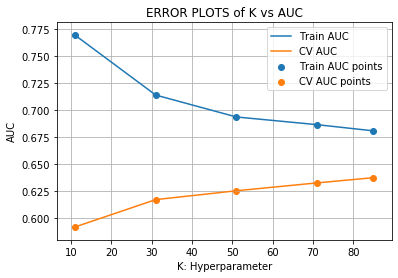

In [93]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
a = []
b = []

K = [ 11, 31, 51, 71,85]

for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr, y_train)

    y_train_pred = batch_predict(neigh, X_tr)    
    y_cv_pred = batch_predict(neigh, X_cr)
    

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    a.append(y_train_pred)
    b.append(y_cv_pred)

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: Hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS of K vs AUC")
plt.grid()
plt.show()

### The hyperparameter K from the given graph can be inferred to be 85

##  B) Gridsearch cv
  
  - In the gridlayout each values are applied to find right hyperparameter
  
  - Whereas in random search method any random value is tried to find right hyperparameter,certainly quicker
  
  - But doesnt gaurantee optimal solution


<img src="grid.png" width=700 height=700>

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_neighbors=11 ..................................................
[CV] ................................... n_neighbors=11, total=  44.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


[CV] n_neighbors=11 ..................................................
[CV] ................................... n_neighbors=11, total=  41.5s
[CV] n_neighbors=31 ..................................................
[CV] ................................... n_neighbors=31, total=  41.1s
[CV] n_neighbors=31 ..................................................
[CV] ................................... n_neighbors=31, total=  40.9s
[CV] n_neighbors=51 ..................................................
[CV] ................................... n_neighbors=51, total=  41.4s
[CV] n_neighbors=51 ..................................................
[CV] ................................... n_neighbors=51, total=  41.9s
[CV] n_neighbors=71 ..................................................
[CV] ................................... n_neighbors=71, total=  41.4s
[CV] n_neighbors=71 ..................................................
[CV] ................................... n_neighbors=71, total=  43.8s
[CV] n

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 14.1min finished


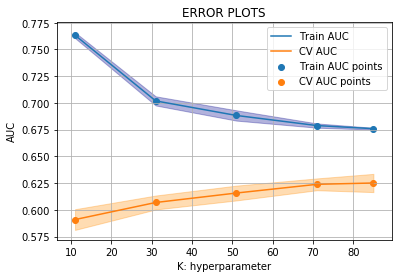

In [94]:
# Code snippet taken from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsClassifier()

parameters = {'n_neighbors':[11,31,51, 71, 85]}

#return_train_score needs to be set True

clf = GridSearchCV(neigh, parameters, cv=2 , scoring='roc_auc',return_train_score=True,verbose=2)

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(parameters['n_neighbors'], train_auc, label='Train AUC')
# this code snippet taken from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['n_neighbors'], cv_auc, label='CV AUC')
# this code snippet taken from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['n_neighbors'], train_auc, label='Train AUC points')
plt.scatter(parameters['n_neighbors'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()

In [95]:
best_k_set1 = 85   #Using plot we can deduce that it is roughly best k (Not much improvement after k=80)
print("The best k found for set 1 is ",best_k_set1)

The best k found for set 1 is  85


In [96]:
from IPython.display import HTML
import pandas as pd
import numpy as np

def create_download_link(title = "Download the file", filename = "data.csv"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

# create a link to download the dataframe which was saved with .to_csv method
#create_download_link(filename='submission.csv')

In [97]:
with open('knn1.pkl', 'wb') as f:
    pickle.dump(clf, f)
create_download_link(filename='knn1.pkl')       #creating a file for set1 to avoid training model again n again

## C) Training model using the best hyperparameter found by our analysis

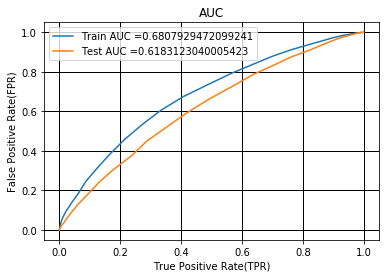

In [98]:
# Code snippet taken from here
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k_set1)
neigh.fit(X_tr, y_train)

#  In case of roc_auc_score(y_true, y_score) y_score should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()

### We observe that set1/Model1  gives Test AUC of 0.618 while train AUC of 0.680

## D) Plotting Confusion Matrix

In [99]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) if we need to maximize this value tpr should be high but fpr should be low
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


### Train data

In [100]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")# Printing size of confusion matrix for train data
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24986989643163918 for threshold 0.776
[[ 1771  1692]
 [ 5027 13955]]


In [101]:
conf_matr_df_train = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24986989643163918 for threshold 0.776


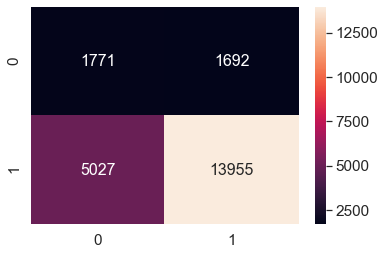

In [102]:
sns.set(font_scale=1.4)#for label size,using annot=true numbers are displayed in corrosponding cells
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 16}, fmt='g') #fmt='g' implies general format 
# Reference taken from here : https://fmt.dev/latest/syntax.html

## summary of confusion matrix for train data for set1

- set1 predicted positive class 15,667 times(1692 + 13955) ,of which it was correct 13955 times
- it predicted negative class 6778 times(1771 + 5027),out of which it was correct 1771 times,It failed to predict false negative cases

### test data

In [103]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24997778503192472 for threshold 0.788
[[1285 1261]
 [4683 9271]]


In [104]:
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24997778503192472 for threshold 0.788


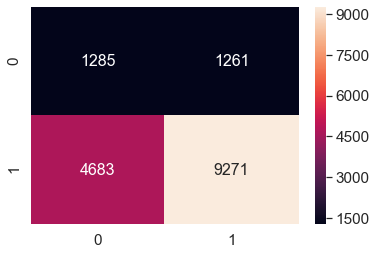

In [105]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

## Summary for test data for set 1

- set2 predicted positive class for 10532 datapoints(1261 + 9271) ,out of which it was correct 9271 times.

- It predicted negative class for 5968 datapoints(1285 +4683) ,out of which only 1285 were correct.

- Again a large number of false negatives.

## Set 2 : categorical, numerical features + project_title(TFIDF) + preprocessed_essay (TFIDF)

In [106]:
# Reference taken from here how to merge two sparse matrices using csr(): https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, text_tfidf_train, title_tfidf_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, text_tfidf_test, title_tfidf_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, text_tfidf_cv, title_tfidf_cv)).tocsr()

In [107]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 6345) (22445,)
(11055, 6345) (11055,)
(16500, 6345) (16500,)


### A)Finding the best hyperparameter which has maximum AUC value

In [108]:
train_auc = []
cv_auc = []
K = [11,31,51,71,81]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr, y_train)

    y_train_pred = batch_predict(neigh, X_tr)    
    y_cv_pred = batch_predict(neigh, X_cr)

    # In roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

100%|███████████████████████████████████████████| 5/5 [23:13<00:00, 277.27s/it]


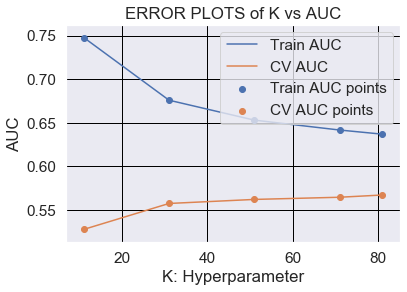

In [109]:
# references taken for gridlines https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.grid.html

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: Hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS of K vs AUC")
plt.grid(color='black', linestyle='-', linewidth=1)


### B) Using Gridsearch-cv

In [110]:
neigh = KNeighborsClassifier()
parameters = {'n_neighbors':[ 11, 31, 51, 71, 81]}
clf = GridSearchCV(neigh, parameters, cv=2, scoring='roc_auc',return_train_score=True,verbose=2)
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']



Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_neighbors=11 ..................................................
[CV] ................................... n_neighbors=11, total=  43.7s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


[CV] n_neighbors=11 ..................................................
[CV] ................................... n_neighbors=11, total=  42.0s
[CV] n_neighbors=31 ..................................................
[CV] ................................... n_neighbors=31, total=  41.4s
[CV] n_neighbors=31 ..................................................
[CV] ................................... n_neighbors=31, total=  41.4s
[CV] n_neighbors=51 ..................................................
[CV] ................................... n_neighbors=51, total=  41.9s
[CV] n_neighbors=51 ..................................................
[CV] ................................... n_neighbors=51, total=  41.8s
[CV] n_neighbors=71 ..................................................
[CV] ................................... n_neighbors=71, total=  42.1s
[CV] n_neighbors=71 ..................................................
[CV] ................................... n_neighbors=71, total=  42.4s
[CV] n

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 14.0min finished


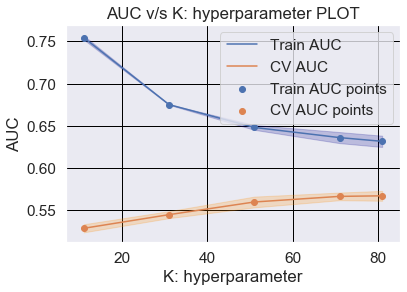

In [111]:
plt.plot(parameters['n_neighbors'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['n_neighbors'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['n_neighbors'], train_auc, label='Train AUC points')
plt.scatter(parameters['n_neighbors'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC v/s K: hyperparameter PLOT")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()

In [112]:
with open('knn2.pkl', 'wb') as f:
    pickle.dump(clf, f)
create_download_link(filename='knn2.pkl')

In [113]:
best_k_set2 = 81 #from plot we conclude
print("The best k found for set 2 is ",best_k_set2)

The best k found for set 2 is  81


### C) Training model using best hyperparameter found in our analysis for set 2



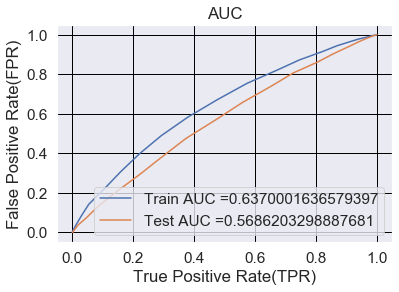

In [114]:
neigh = KNeighborsClassifier(n_neighbors=best_k_set2)
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()

### We observe that for set 2 we obtain a train AUC of 0.64 and test AUC of 0.576

### D) Plotting confusion matrix

#### Train data

In [115]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24947297735751794 for threshold 0.84
[[ 1811  1652]
 [ 6229 12753]]


In [116]:

conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24947297735751794 for threshold 0.84


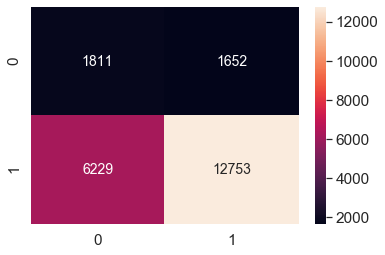

In [117]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 14}, fmt='g')

## Summary for confusion matrix for set 2 train data

- We observe that set2 makes a positive prediction for training data 14249 times(12753 + 1652),it is correct 12,753 times,roughly 88% times

- It makes a negative prediction 8040 times (1811 + 6229) ,it is correct only small number of times roughly 22% times

- Again has alot of false negatives

#### Test data

In [118]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24917789191060447 for threshold 0.852
[[1346 1200]
 [6008 7946]]


In [119]:
conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24917789191060447 for threshold 0.852


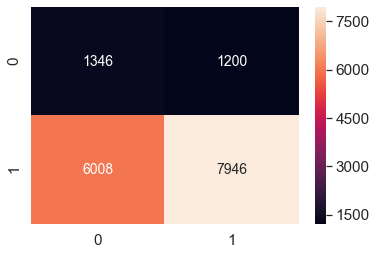

In [120]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 14}, fmt='g')

## Summary of confusion matrix for set 2 test data

- set2 makes predicts positive class 9146 times, out of which it is correct 7946 times,roughly 89% times
- it predicts negative class 7354 times ( 1346 + 6008) ,out of which it is correct 1346 times,roughly 18.5% times

# Set 3 :  categorical, numerical features + project_title(AVG W2V) + preprocessed_essay (AVG W2V

In [121]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, avg_w2v_vectors_train, avg_w2v_vectors_titles_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, avg_w2v_vectors_test, avg_w2v_vectors_titles_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, avg_w2v_vectors_cv, avg_w2v_vectors_titles_cv)).tocsr()

In [122]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 704) (22445,)
(11055, 704) (11055,)
(16500, 704) (16500,)


## A) Finding the best hyperparameter k which gives the maximum AUC

100%|████████████████████████████████████████| 5/5 [3:34:14<00:00, 2721.74s/it]


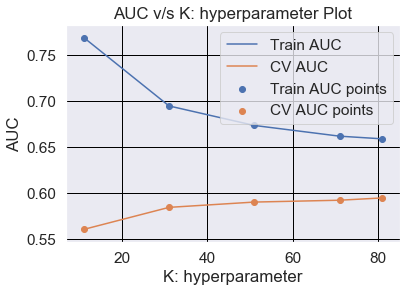

In [123]:
train_auc = []
cv_auc = []

K = [ 11,31, 51,71,81]

for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr, y_train)

    y_train_pred = batch_predict(neigh, X_tr)    
    y_cv_pred = batch_predict(neigh, X_cr)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC v/s K: hyperparameter Plot")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()

## B) Gridsearch -cv

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_neighbors=11 ..................................................
[CV] ................................... n_neighbors=11, total= 9.0min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 17.8min remaining:    0.0s


[CV] n_neighbors=11 ..................................................
[CV] ................................... n_neighbors=11, total= 8.9min
[CV] n_neighbors=31 ..................................................
[CV] ................................... n_neighbors=31, total= 9.6min
[CV] n_neighbors=31 ..................................................
[CV] ................................... n_neighbors=31, total= 9.6min
[CV] n_neighbors=51 ..................................................
[CV] ................................... n_neighbors=51, total= 9.2min
[CV] n_neighbors=51 ..................................................
[CV] ................................... n_neighbors=51, total= 9.6min
[CV] n_neighbors=71 ..................................................
[CV] ................................... n_neighbors=71, total= 8.7min
[CV] n_neighbors=71 ..................................................
[CV] ................................... n_neighbors=71, total= 9.2min
[CV] n

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 183.1min finished


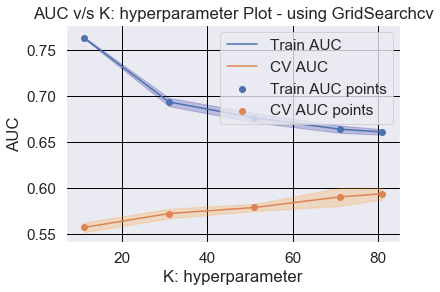

In [124]:
# code snippet taken from here https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

neigh = KNeighborsClassifier()
parameters = {'n_neighbors':[ 11, 31, 51, 71, 81]}
clf = GridSearchCV(neigh, parameters, cv=2, scoring='roc_auc',return_train_score=True,verbose=2)
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(parameters['n_neighbors'], train_auc, label='Train AUC')
# this code snippet taken from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['n_neighbors'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['n_neighbors'], train_auc, label='Train AUC points')
plt.scatter(parameters['n_neighbors'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC v/s K: hyperparameter Plot - using GridSearchcv")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()

In [125]:
with open('knn3.pkl', 'wb') as f:
    pickle.dump(clf, f)
create_download_link(filename='knn3.pkl')

In [126]:
best_k_set3 = 81
print("The best k found for set 3 is ",best_k_set3)

The best k found for set 3 is  81


## C) train the model using the best hyperparameter we found in our analysis

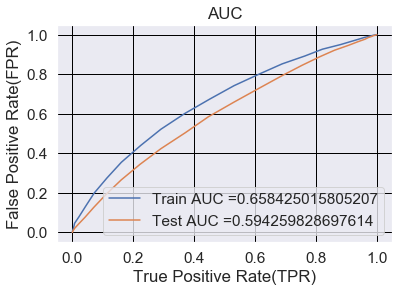

In [127]:

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

neigh = KNeighborsClassifier(n_neighbors=best_k_set3)
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()

## D) Plotting confusion Matrix

#### Train data

In [128]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24901835492220095 for threshold 0.827
[[ 1623  1840]
 [ 4896 14086]]


In [129]:
conf_matr_df_train_2 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24901835492220095 for threshold 0.827


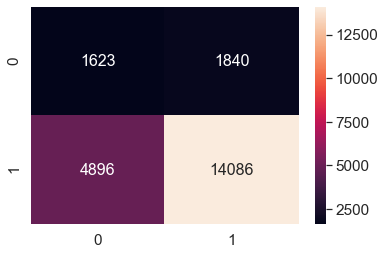

In [130]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_2, annot=True,annot_kws={"size": 16}, fmt='g')

### Summary of model 3 for train data

- Set 3 predicts positive class label in 21926 cases(1840 + 14086),out of which it is right 88% times

- It predicts negative label in  6519 cases (1623 + 4896),out of which it is right 25% times

#### test data

In [131]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24903719711279465 for threshold 0.84
[[1194 1352]
 [4761 9193]]


In [132]:
conf_matr_df_test_2 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24903719711279465 for threshold 0.84


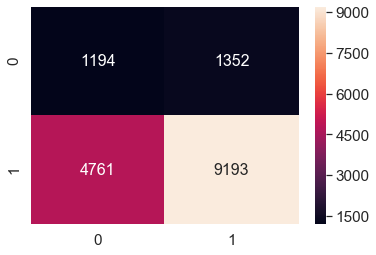

In [133]:

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_2, annot=True,annot_kws={"size": 16}, fmt='g')

### Summary of the heat map of test data

- According to confusion matrix,model predicts positive class 10645 times(9193 + 1352),out of which it is right in 87% cases

- Model Predicts negative class 5955 times (1194 + 4761),out of which it is correct 20% times,false negatives are alot in mumber(4761)

# Set 4 : categorical, numerical features + project_title(TFIDF W2V) + preprocessed_essay (TFIDF W2V)

In [134]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, tfidf_w2v_vectors_train, tfidf_w2v_vectors_titles_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, tfidf_w2v_vectors_test, tfidf_w2v_vectors_titles_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, tfidf_w2v_vectors_cv, tfidf_w2v_vectors_titles_cv)).tocsr()

In [135]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 704) (22445,)
(11055, 704) (11055,)
(16500, 704) (16500,)


## A) finding the best hyperparameter which gives the maximum AUC

100%|████████████████████████████████████████| 5/5 [5:55:33<00:00, 4212.59s/it]


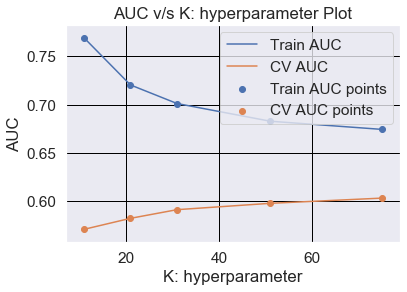

In [136]:
train_auc = []
cv_auc = []

K = [11,21, 31, 51,75]

for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr, y_train)

    y_train_pred = batch_predict(neigh, X_tr)    
    y_cv_pred = batch_predict(neigh, X_cr)
    #In case of roc_auc_score(y_true, y_score) y_score should be prob estimatate
    #of positive labelled class and not the predicted output      
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC v/s K: hyperparameter Plot")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()

## B) Gridsearch -cv

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_neighbors=11 ..................................................
[CV] ................................... n_neighbors=11, total=11.5min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 22.7min remaining:    0.0s


[CV] n_neighbors=11 ..................................................
[CV] ................................... n_neighbors=11, total=10.7min
[CV] n_neighbors=21 ..................................................
[CV] ................................... n_neighbors=21, total=11.2min
[CV] n_neighbors=21 ..................................................
[CV] ................................... n_neighbors=21, total=11.5min
[CV] n_neighbors=31 ..................................................
[CV] ................................... n_neighbors=31, total=11.0min
[CV] n_neighbors=31 ..................................................
[CV] ................................... n_neighbors=31, total=11.2min
[CV] n_neighbors=51 ..................................................
[CV] ................................... n_neighbors=51, total= 9.1min
[CV] n_neighbors=51 ..................................................
[CV] ................................... n_neighbors=51, total= 9.2min
[CV] n

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 205.5min finished


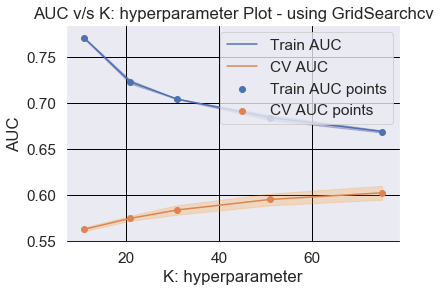

In [137]:
#  code snippet taken from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

neigh = KNeighborsClassifier()
parameters = {'n_neighbors':[11,21,31,51,75]}
clf = GridSearchCV(neigh, parameters, cv=2, scoring='roc_auc',return_train_score=True,verbose=2)
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(parameters['n_neighbors'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['n_neighbors'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['n_neighbors'], train_auc, label='Train AUC points')
plt.scatter(parameters['n_neighbors'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC v/s K: hyperparameter Plot - using GridSearchcv")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()

In [138]:
with open('knn4.pkl', 'wb') as f:
    pickle.dump(clf, f)
create_download_link(filename='knn4.pkl')

In [139]:

best_k_set4 = 75
print("The best k found for set 4 is" ,best_k_set4)

The best k found for set 4 is 75


## Training model using best hyperparameter value we got in our analysis

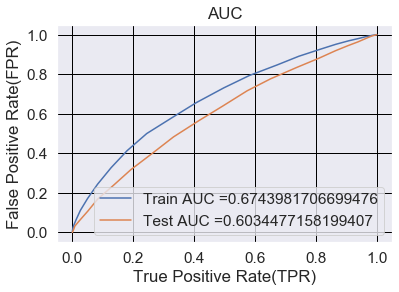

In [140]:
#  code snippet taken from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

neigh = KNeighborsClassifier(n_neighbors=best_k_set4)
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()

## Plotting the confusion matrix

### train data

In [141]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999397533548212 for threshold 0.827
[[ 1740  1723]
 [ 5108 13874]]


In [142]:

conf_matr_df_train_3 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999397533548212 for threshold 0.827


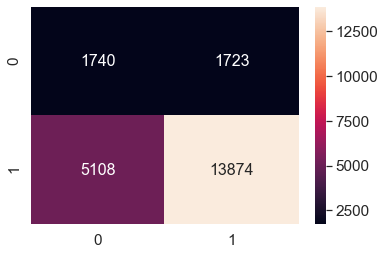

In [143]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_3, annot=True,annot_kws={"size": 16}, fmt='g')

## summary about train data

13874 are true positives while 5108 are false negatives

### test data

In [144]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24997392826663395 for threshold 0.84
[[1286 1260]
 [5028 8926]]


In [145]:
conf_matr_df_test_3 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24997392826663395 for threshold 0.84


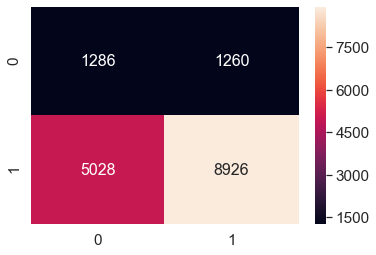

In [146]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_3, annot=True,annot_kws={"size": 16}, fmt='g')

# Summary

- 8926 are true positives while 5028 are false negatives

<h2>2.5 Feature selection with `SelectKBest` </h2>

In [156]:
X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, text_tfidf_train, title_tfidf_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, text_tfidf_test, title_tfidf_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, text_tfidf_cv, title_tfidf_cv)).tocsr()

In [157]:
from sklearn.feature_selection import SelectKBest, chi2

sel=SelectKBest(chi2,k=2000).fit(X_tr,y_train)      # modifications done here
X_tr_new1=sel.transform(X_tr)
X_te_new1=sel.transform(X_te)
X_cr_new1=sel.transform(X_cr)

In [159]:
print("Final Data matrix")
print(X_tr_new1.shape, y_train.shape)
print(X_cr_new1.shape, y_cv.shape)
print(X_te_new1.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 2000) (22445,)
(11055, 2000) (11055,)
(16500, 2000) (16500,)


## A) Finding best hyperparameter using best 2000 features on set2


100%|███████████████████████████████████████████| 5/5 [14:48<00:00, 177.56s/it]

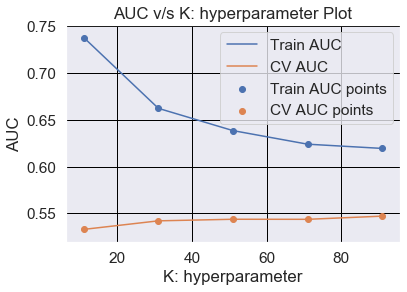

In [161]:
train_auc = []
cv_auc = []

K = [11, 31,51 ,71,91]

for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr_new, y_train)

    y_train_pred = batch_predict(neigh, X_tr_new1)    
    y_cv_pred = batch_predict(neigh, X_cr_new1)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))







plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC v/s K: hyperparameter Plot")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()

## B) gridsearch -cv

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_neighbors=11 ..................................................
[CV] ................................... n_neighbors=11, total=  27.7s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   55.5s remaining:    0.0s


[CV] n_neighbors=11 ..................................................
[CV] ................................... n_neighbors=11, total=  27.4s
[CV] n_neighbors=31 ..................................................
[CV] ................................... n_neighbors=31, total=  26.5s
[CV] n_neighbors=31 ..................................................
[CV] ................................... n_neighbors=31, total=  27.7s
[CV] n_neighbors=51 ..................................................
[CV] ................................... n_neighbors=51, total=  28.5s
[CV] n_neighbors=51 ..................................................
[CV] ................................... n_neighbors=51, total=  27.7s
[CV] n_neighbors=71 ..................................................
[CV] ................................... n_neighbors=71, total=  27.9s
[CV] n_neighbors=71 ..................................................
[CV] ................................... n_neighbors=71, total=  27.9s
[CV] n

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  9.3min finished


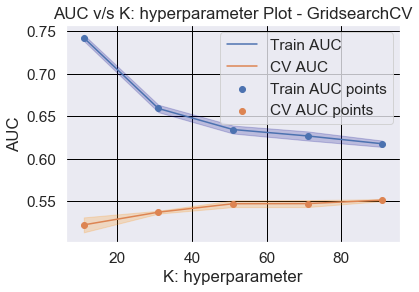

In [162]:
# code snippet taken from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

neigh = KNeighborsClassifier()

parameters = {'n_neighbors':[ 11, 31, 51, 71, 91]}

#return_train_score has default value has False,need to change it to True.
# verbose=2 to display progress and see messages while processing.

clf = GridSearchCV(neigh, parameters, cv=2, scoring='roc_auc',return_train_score=True,verbose=2)
clf.fit(X_tr_new1, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(parameters['n_neighbors'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['n_neighbors'], cv_auc, label='CV AUC')
# this code snippet is taken from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['n_neighbors'], train_auc, label='Train AUC points')
plt.scatter(parameters['n_neighbors'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC v/s K: hyperparameter Plot - GridsearchCV")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()

In [163]:
with open('knn5.pkl', 'wb') as f:
    pickle.dump(clf, f)
create_download_link(filename='knn5.pkl')

In [164]:
best_k_set5 =91
#best k found using grid search cv when using 2000 features on set2 using tfidf
print("The best k found using 2000 features on set2 is ",best_k_set5)


The best k found using 2000 features on set2 is  91


## C) training model using best hyperparameter we found in our analysis

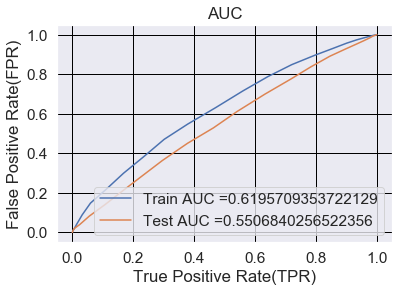

In [165]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

neigh = KNeighborsClassifier(n_neighbors=best_k_set5)
neigh.fit(X_tr_new1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr_new1)    
y_test_pred = batch_predict(neigh, X_te_new1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()

## D) plotting Confusion Matrix

### train data

In [166]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24912392205409958 for threshold 0.835
[[ 1834  1629]
 [ 7013 11969]]


In [167]:
conf_matr_df_train_4 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24912392205409958 for threshold 0.835


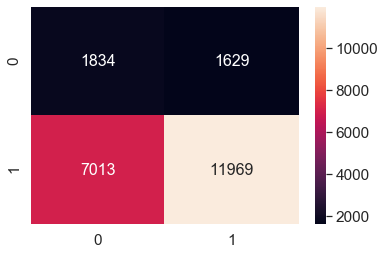

In [168]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_4, annot=True,annot_kws={"size": 16}, fmt='g')

## Summary for train data

-  It predicts positive class 13598 times,out of which it is correct in 11969 cases,about 87% times

- It predicts  negative class in 8847 times ,with large fraction as false negatives

### test data

In [169]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2486657134799809 for threshold 0.846
[[1366 1180]
 [6579 7375]]


In [170]:
conf_matr_df_test_4 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.2486657134799809 for threshold 0.846


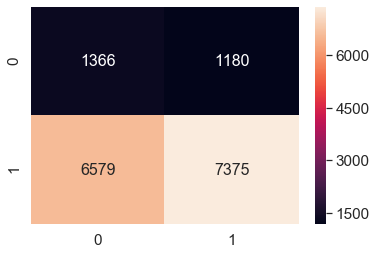

In [171]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_4, annot=True,annot_kws={"size": 16}, fmt='g')

## Sumary about model 5 test data confusion matrix

- It predicts positive classes about 7375 + 1180  times ,of which it is correct 7375 times



<h1>3. Conclusions</h1>

In [174]:
#Compare all your models using Prettytable library


from prettytable import PrettyTable



x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper Parameter", "AUC"]

x.add_row(["BOW", "Brute",91 , 0.618])
x.add_row(["TFIDF", "Brute", 81, 0.566])
x.add_row(["AVG W2V", "Brute", 81, 0.594])
x.add_row(["TFIDF W2V", "Brute", 75, 0.603])
x.add_row(["TFIDF", "Top 2000", 91, 0.550])

print(x)

+------------+----------+-----------------+-------+
| Vectorizer |  Model   | Hyper Parameter |  AUC  |
+------------+----------+-----------------+-------+
|    BOW     |  Brute   |        91       | 0.618 |
|   TFIDF    |  Brute   |        81       | 0.566 |
|  AVG W2V   |  Brute   |        81       | 0.594 |
| TFIDF W2V  |  Brute   |        75       | 0.603 |
|   TFIDF    | Top 2000 |        91       |  0.55 |
+------------+----------+-----------------+-------+


# Summary about all models

1. As per analysis using K=91 with vectorizer as BOW has highest AUC followed by TFIDF W2V (K=75) with Auc of 0.603

2. Using tfidf with only 2000 features gives us least AUC among all models so going by such small features does not solve our problem

# difference between fit(),transform(),fit_transform()

- To center the data (make it have zero mean and unit standard error), you subtract the mean and then divide the result by the standard deviation.
- fit() just calculates the parameters (e.g. mu and sigma in case of StandardScaler) and saves them as an internal objects state. Afterwards, you can call its transform() method to apply the transformation to a particular set of examples
 - for egs fit() function happens only on training data while transform () involves changing the values by keeping mu and sigma in calculation x'= ((x-mu)/sigma))
    
  -  Using fix_transform(),  we join these two steps and is used for the initial fitting of parameters on the training set x, but it also returns a transformed x′. Internally, it just calls first fit() and then transform() on the same data.
   

- generally fit_transform() should be applied on train data,and not on cv and test data,once fit has been done then we can use transform () on cv and test data